In [1]:
pip install pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib statsmodels seaborn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Explore the data

In [4]:
from IPython.display import display, HTML

In [5]:
# Load the data
train_data = pd.read_csv("C:\\Users\\pidik\\Downloads\\train housing.csv")
test_data = pd.read_csv("C:\\Users\\pidik\\Downloads\\test housing.csv")

In [6]:
df = pd.read_csv("C:\\Users\\pidik\\Downloads\\train housing.csv")
print(df.head())
print(df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
df.shape

(1460, 81)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Print column names and data types
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

In [10]:
numerical_features = df.select_dtypes(include = [np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
def create_scrollable_table(dataframe, table_id, title):
    # Implementation of create_scrollable_table function (replace this with your actual implementation)
    html_code = f"""
        <div style="overflow-x:auto;">
            <table id="{table_id}">
                <caption>{title}</caption>
                {dataframe.to_html()}
            </table>
        </div>
    """
    return html_code

In [12]:
#summary statistics
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [13]:
# Missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Assuming you have the create_scrollable_table function implemented
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of Missing Values')
display(HTML(html_missing_percentage))

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


# Graph Plotting

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

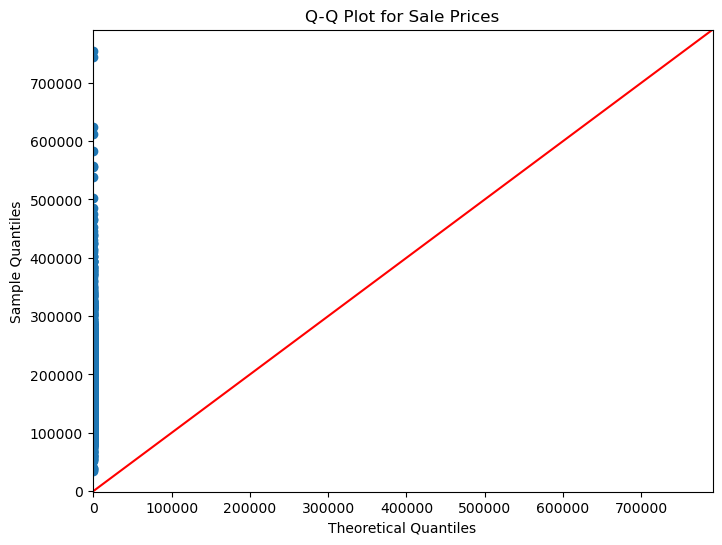

In [15]:
# Q-Q Plot
def plot_qq(data, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(data, line='45', ax=ax)
    ax.set_title(title)
    plt.show()

sales_prices = df['SalePrice']

# Plot Q-Q Plot
plot_qq(sales_prices, 'Q-Q Plot for Sale Prices')

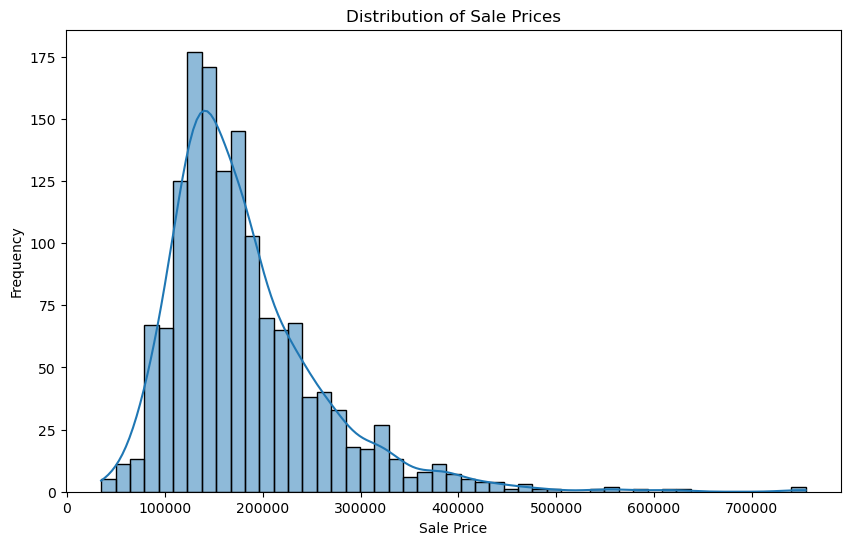

In [16]:
# Sales Distribution Plot
def plot_sales_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel('Sale Price')
    plt.ylabel('Frequency')
    plt.show()

sales_prices = df['SalePrice']

# Plot Sales Distribution
plot_sales_distribution(sales_prices, 'Distribution of Sale Prices')

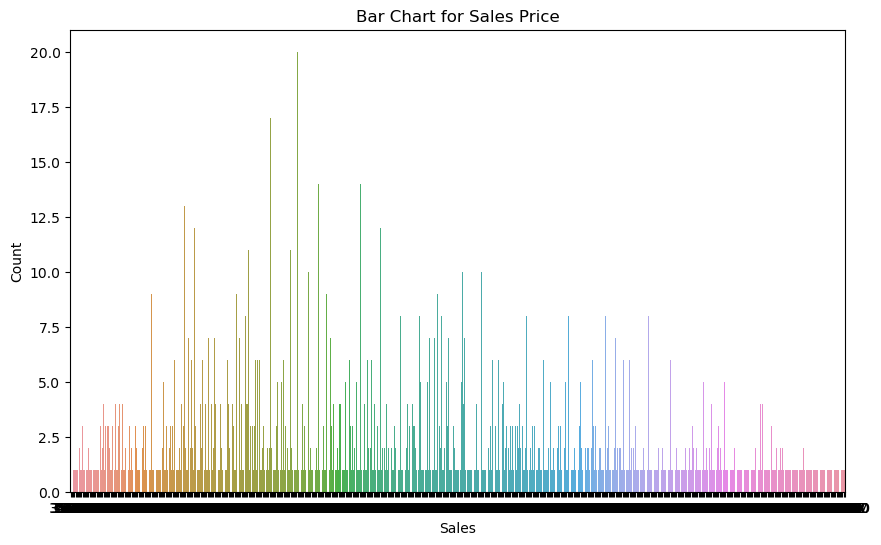

In [17]:
Sales_Price = df['SalePrice']

# Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x=Sales_Price)
plt.title('Bar Chart for Sales Price')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

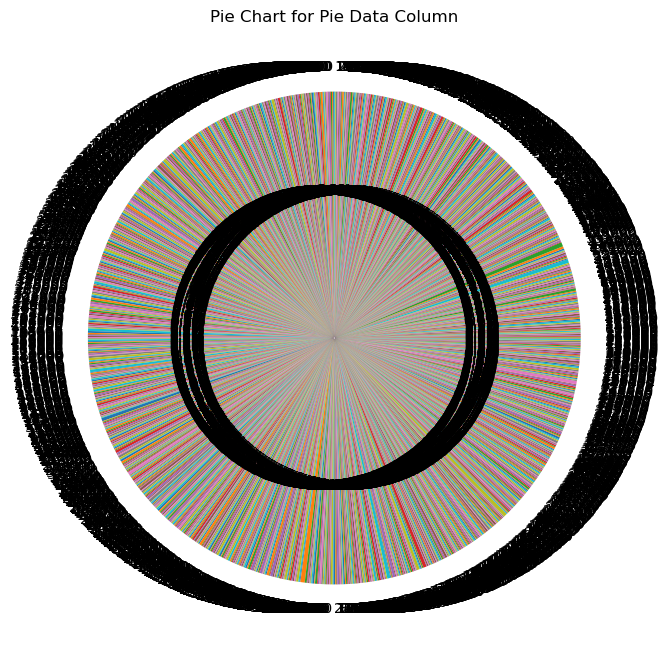

In [28]:
pie_data = df['SalePrice']

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=df['SalePrice'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Pie Data Column')
plt.show()


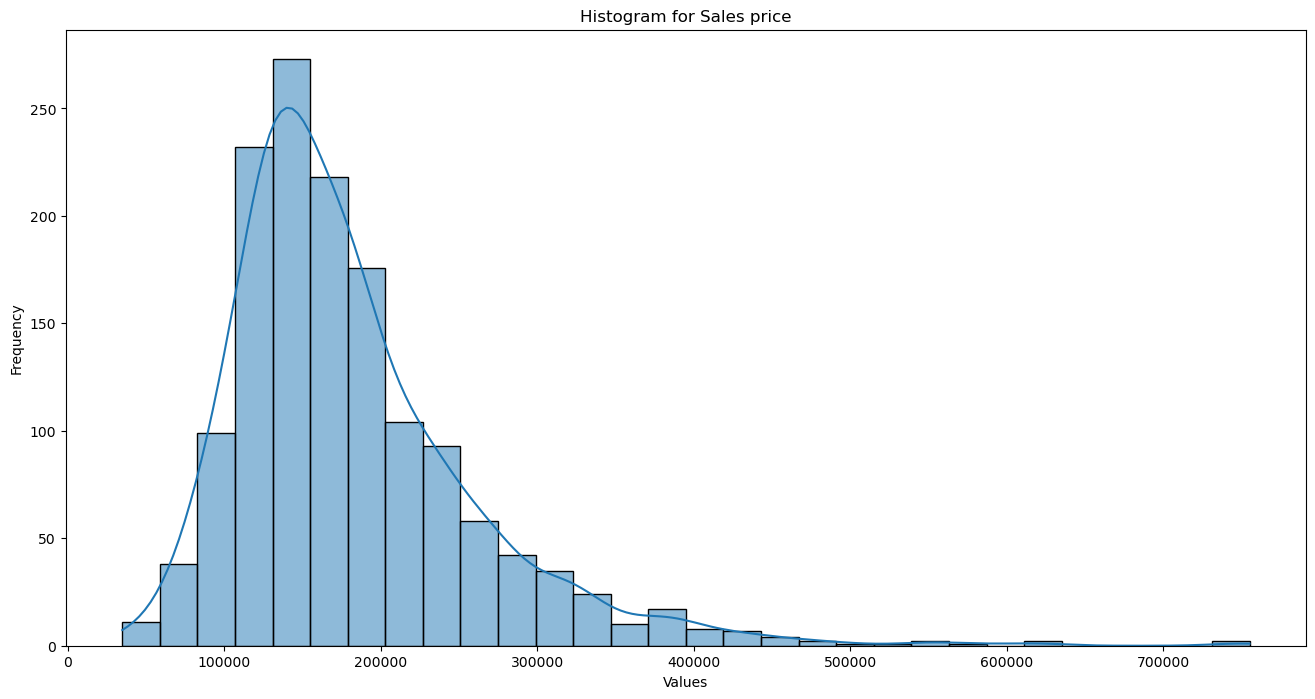

In [29]:
# Assuming 'numeric_column' is a numeric column in your dataset
Sales_price = df['SalePrice']

# Histogram
plt.figure(figsize=(16, 8))
sns.histplot(Sales_price, bins=30, kde=True)
plt.title('Histogram for Sales price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Pipeline

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [22]:
# Define preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
# Create a ColumnTransformer to apply the transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
# Create a pipeline with preprocessing and model training steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor())])

In [25]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [26]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [27]:
# Evaluate the model (you may need to adjust this based on your specific problem)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 818990739.3537948


# Fit and train models

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [31]:
# Define the hyperparameter grid to search
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [33]:
# Use GridSearchCV to perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrS...
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [34]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [35]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Best Model Mean Squared Error: {mse}')
print(f'Best Model Parameters: {grid_search.best_params_}')

Best Model Mean Squared Error: 854531654.9191672
Best Model Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 150}


# Principle component Analysis

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
# Assuming 'df' is your DataFrame
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Exclude non-numeric columns
numeric_features = numeric_features.drop(columns=['Id'])  

# Handling missing values 
numeric_features = numeric_features.fillna(0)  

In [44]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [45]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [46]:
# Create a DataFrame to visualize the explained variance of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

pca_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance Ratio': cumulative_variance_ratio
})

In [47]:
# Print the DataFrame
print(pca_df)

    Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                     1              2.057019e-01                   0.205702
1                     2              8.625820e-02                   0.291960
2                     3              5.946725e-02                   0.351427
3                     4              5.549586e-02                   0.406923
4                     5              4.150125e-02                   0.448424
5                     6              3.506558e-02                   0.483490
6                     7              3.210526e-02                   0.515595
7                     8              3.142882e-02                   0.547024
8                     9              3.032675e-02                   0.577351
9                    10              2.914459e-02                   0.606495
10                   11              2.865827e-02                   0.635154
11                   12              2.770849e-02                   0.662862

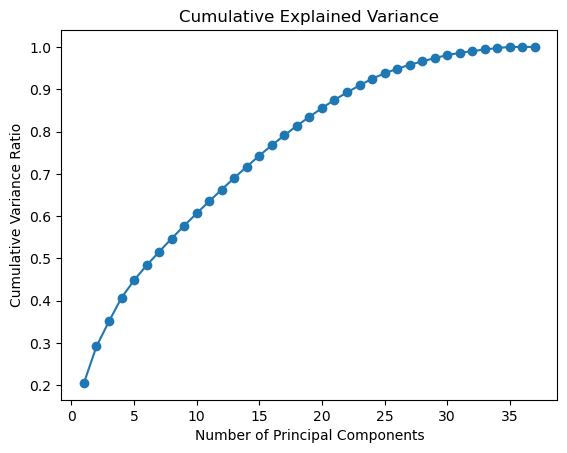

In [48]:
# Plot the cumulative explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# Submissions

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# training dataset
train_data = pd.read_csv("C:\\Users\\pidik\\Downloads\\train housing.csv")

# test dataset
test_data = pd.read_csv("C:\\Users\\pidik\\Downloads\\test housing.csv")

In [53]:
# Extract numeric features for both training and test data
numeric_features_train = train_data.select_dtypes(include=['int64', 'float64'])
numeric_features_test = test_data.select_dtypes(include=['int64', 'float64'])

In [54]:
# Exclude non-numeric columns
numeric_features_train = numeric_features_train.drop(columns=['Id', 'SalePrice'])  # Update with actual non-numeric columns
numeric_features_test = numeric_features_test.drop(columns=['Id'])

In [55]:
# Handling missing values (modify as needed)
numeric_features_train = numeric_features_train.fillna(0)  # Replace missing values with 0, choose a strategy based on your needs
numeric_features_test = numeric_features_test.fillna(0)

In [56]:
# Standardize the data using the same scaler used during training
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(numeric_features_train)
scaled_data_test = scaler.transform(numeric_features_test)

In [57]:
# Perform PCA using the same PCA model used during training
pca = PCA()
pca_result_train = pca.fit_transform(scaled_data_train)
pca_result_test = pca.transform(scaled_data_test)

In [58]:
# Assuming 'model' is your RandomForestRegressor trained model
model = RandomForestRegressor()
model.fit(pca_result_train, train_data['SalePrice']) 

RandomForestRegressor()

In [59]:
# Make predictions on the test data
predictions = model.predict(pca_result_test)

In [60]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'Id': test_data['Id'],  
    'SalePrice': predictions
})

In [62]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv("C:\\Users\\pidik\\Downloads\\Hosuing.csv", index=False)